# Deriving Financial Insights

In [2]:
pip install graphviz

In [3]:

import numpy as np #numerical computation
import pandas as pd #data wrangling

import matplotlib as mpl #add'l plotting functionality
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline

import graphviz #to visualize decision trees

In [4]:
df_orig = pd.read_excel("C:/Users/Dell/Desktop/default_of_credit_card_clients.xls")

In [5]:
df_zero_mask = df_orig == 0

In [6]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [7]:
sum(feature_zero_mask)

315

# Remove all the rows with all zero features and response, confirm this that gets rid of the duplicate IDs.



In [8]:
df_clean = df_orig.loc[~feature_zero_mask,:].copy()
df_clean.shape

(29685, 25)

In [9]:
df_clean['ID'].nunique()

29685

# Clean up the EDUCATION and MARRIAGE features as in Task 1

In [10]:
df_clean['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
5      275
4      122
6       49
0       14
Name: EDUCATION, dtype: int64

In [12]:
df_clean['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
4      460
Name: EDUCATION, dtype: int64

In [13]:
df_clean['MARRIAGE'].value_counts()

2    15810
1    13503
3      318
0       54
Name: MARRIAGE, dtype: int64

In [14]:
#should only be (1 = married; 2 = single; 3 = others).
df_clean['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [15]:
df_clean['MARRIAGE'].value_counts()

2    15810
1    13503
3      372
Name: MARRIAGE, dtype: int64

In [16]:
df_clean['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [17]:
missing_pay_1_mask = df_clean['PAY_1'] == 'Not available'

In [18]:
sum(missing_pay_1_mask)

3021

In [19]:
df_missing_pay_1 = df_clean.loc[missing_pay_1_mask,:].copy()

In [20]:
df_missing_pay_1.shape

(3021, 25)

In [21]:
df_missing_pay_1['PAY_1'].head(3)

17    Not available
28    Not available
29    Not available
Name: PAY_1, dtype: object

In [22]:
df_missing_pay_1['PAY_1'].value_counts()

Not available    3021
Name: PAY_1, dtype: int64

In [23]:
df_missing_pay_1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [25]:
df = pd.read_csv("C:/Users/Dell/Desktop/cleaned_data.csv")

df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [26]:
features_response = df.columns.tolist()

In [27]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [28]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [30]:
print(df_missing_pay_1.shape)
print(features_response[4])
print(np.median(X_train[:,4]))

(3021, 25)
PAY_1
0.0


In [31]:
np.random.seed(seed=1)
fill_values = [0, np.random.choice(X_train[:,4], size=(3021,), replace=True)]

fill_strategy = ['mode', 'random']

fill_values[-1]

array([ 0,  0,  0, ...,  2,  0, -2], dtype=int64)

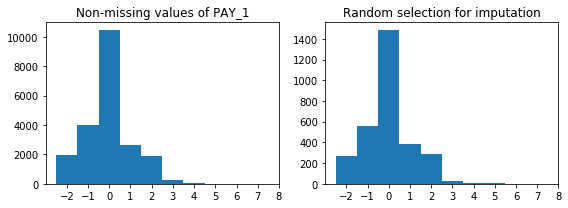

In [32]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
bin_edges = np.arange(-2,9)
axs[0].hist(X_train[:,4], bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(fill_values[-1], bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Random selection for imputation')
plt.tight_layout()

In [33]:
from sklearn.model_selection import KFold

k_folds = KFold(n_splits=4, shuffle=True, random_state=1)
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier\
(n_estimators=200, criterion='gini', max_depth=9,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=1, warm_start=False, class_weight=None)

In [35]:
for counter in range(len(fill_values)):
    #Copy the data frame with missing PAY_1 and assign imputed values
    df_fill_pay_1_filled = df_missing_pay_1.copy()
    df_fill_pay_1_filled['PAY_1'] = fill_values[counter]
    
    #Split imputed data in to training and testing, using the same
    #80/20 split we have used for the data with non-missing PAY_1
    X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
    train_test_split(
        df_fill_pay_1_filled[features_response[:-1]].values,
        df_fill_pay_1_filled['default payment next month'].values,
    test_size=0.2, random_state=24)
    
    #Concatenate the imputed data with the array of non-missing data
    X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
    y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
    
    #Use the KFolds splitter and the random forest model to get
    #4-fold cross-validation scores for both imputation methods
    imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')
    
    test_score = imputation_compare_cv['test_score']
    print(fill_strategy[counter] + ' imputation: ' +
          'mean testing score ' + str(np.mean(test_score)) +
          ', std ' + str(np.std(test_score)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   23.9s remaining:   23.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   24.0s finished


mode imputation: mean testing score 0.772866246168149, std 0.0031479941297533737


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   20.4s remaining:   20.4s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   20.5s finished


random imputation: mean testing score 0.7692540439833129, std 0.003660875187678248


# A Predictive Model for PAY_1

In [36]:
pay_1_df = df.copy()

features_for_imputation = pay_1_df.columns.tolist()

items_to_remove_2 = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university', 'default payment next month', 'PAY_1']

features_for_imputation = [item for item in features_for_imputation if item not in items_to_remove_2]
features_for_imputation

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

# Building a Multiclass Classification Model for Imputation

In [37]:
X_impute_train, X_impute_test, y_impute_train, y_impute_test = \
train_test_split(
    pay_1_df[features_for_imputation].values,
    pay_1_df['PAY_1'].values,
test_size=0.2, random_state=24)

rf_impute_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

from sklearn.model_selection import GridSearchCV

In [38]:
cv_rf_impute = GridSearchCV(rf, param_grid=rf_impute_params, scoring='accuracy',
                            n_jobs=-1, iid=False, refit=True,
                            cv=4, verbose=2, error_score=np.nan, return_train_score=True)

cv_rf_impute.fit(X_impute_train, y_impute_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.3s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=9,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=4,
                                              verbose=1, warm_start=False),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],

In [39]:
impute_df = pd.DataFrame(cv_rf_impute.cv_results_)
impute_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.462910,0.013934,0.031286,0.006767,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.665168,0.669541,0.672731,0.663225,0.667666,0.003712,15,0.669313,0.672481,0.665979,0.670020,0.669448,0.002322
1,2.035296,0.009599,0.119413,0.007897,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.656549,0.673290,0.676482,0.644077,0.662599,0.013102,16,0.665562,0.673168,0.670292,0.653212,0.665558,0.007628
2,3.990412,0.010909,0.214830,0.021738,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.671351,0.674414,0.680420,0.666792,0.673244,0.004952,13,0.677504,0.675919,0.673605,0.676393,0.675855,0.001421
3,7.515943,0.052406,0.446364,0.017715,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.663481,0.672352,0.680233,0.669044,0.671278,0.006065,14,0.672002,0.673106,0.671042,0.675581,0.672933,0.001694
4,0.709137,0.015474,0.032785,0.006072,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.702080,0.704967,0.701050,0.695701,0.700950,0.003353,12,0.714455,0.714929,0.709107,0.707011,0.711375,0.003403
5,3.264769,0.041206,0.161377,0.028031,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.706202,0.710965,0.718492,0.701521,0.709295,0.006273,11,0.719082,0.719617,0.722295,0.713447,0.718610,0.003220
6,6.803890,0.092994,0.208894,0.022510,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.710512,0.711153,0.716617,0.705087,0.710842,0.004083,10,0.721083,0.719180,0.720920,0.716071,0.719313,0.002015
7,12.978820,0.025406,0.410894,0.039357,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.712385,0.709278,0.716804,0.706965,0.711358,0.003686,9,0.721145,0.718055,0.719357,0.716883,0.718860,0.001583
8,1.038747,0.030034,0.034369,0.001810,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.719318,0.725586,0.722056,0.721795,0.722188,0.002234,7,0.768101,0.772631,0.770423,0.771932,0.770772,0.001736
9,4.225158,0.026533,0.141870,0.007274,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.727937,0.725586,0.727869,0.731181,0.728143,0.001993,5,0.771852,0.772881,0.776424,0.771995,0.773288,0.001853


In [40]:
cv_rf_impute.best_params_
# {'max_depth': 12, 'n_estimators': 100}

{'max_depth': 12, 'n_estimators': 100}

In [41]:
cv_rf_impute.best_score_
# 0.7337676389523727

0.7337676389523727

In [42]:
pay_1_value_counts = pay_1_df['PAY_1'].value_counts().sort_index()

pay_1_value_counts

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [43]:
pay_1_value_counts/pay_1_value_counts.sum()

-2    0.092859
-1    0.189281
 0    0.490812
 1    0.122300
 2    0.089184
 3    0.010951
 4    0.002363
 5    0.000863
 6    0.000413
 7    0.000338
 8    0.000638
Name: PAY_1, dtype: float64

In [44]:
y_impute_predict = cv_rf_impute.predict(X_impute_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [45]:
from sklearn import metrics

metrics.accuracy_score(y_impute_test, y_impute_predict)


0.7387961747609225

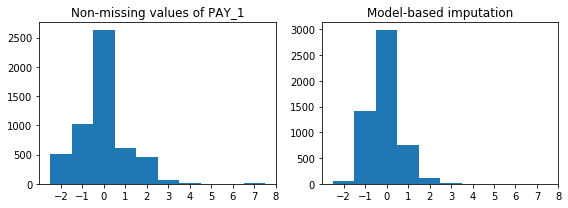

In [46]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
axs[0].hist(y_impute_test, bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(y_impute_predict, bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Model-based imputation')
plt.tight_layout()

In [47]:

X_impute_all = pay_1_df[features_for_imputation].values
y_impute_all = pay_1_df['PAY_1'].values

rf_impute = RandomForestClassifier(n_estimators=100, max_depth=12)
rf_impute

RandomForestClassifier(max_depth=12)
rf_impute.fit(X_impute_all, y_impute_all)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
df_fill_pay_1_model = df_missing_pay_1.copy()

df_fill_pay_1_model['PAY_1'].head()

17    Not available
28    Not available
29    Not available
54    Not available
60    Not available
Name: PAY_1, dtype: object

In [49]:
df_fill_pay_1_model['PAY_1'] = rf_impute.predict(df_fill_pay_1_model[features_for_imputation].values)

df_fill_pay_1_model['PAY_1'].head()

17    0
28   -1
29    0
54    0
60    0
Name: PAY_1, dtype: int64

In [50]:
df_fill_pay_1_model['PAY_1'].value_counts().sort_index()

-2      30
-1     763
 0    1715
 1     438
 2      64
 3       7
 4       2
 6       1
 8       1
Name: PAY_1, dtype: int64

In [51]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

In [52]:
print(X_fill_pay_1_train.shape)
print(X_fill_pay_1_test.shape)
print(y_fill_pay_1_train.shape)
print(y_fill_pay_1_test.shape)

(2416, 17)
(605, 17)
(2416,)
(605,)


In [53]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)

print(X_train_all.shape)
print(y_train_all.shape)


(23747, 17)
(23747,)


In [54]:

rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [55]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   32.2s remaining:   32.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   32.3s finished


In [58]:
np.mean(imputation_compare_cv['test_score'])

0.7726757126815554

In [59]:
np.std(imputation_compare_cv['test_score'])

0.002931480680760725

In [60]:
df_fill_pay_1_model['PAY_1'] = np.zeros_like(df_fill_pay_1_model['PAY_1'].values)

df_fill_pay_1_model['PAY_1'].unique()

df_fill_pay_1_model.shape

(3021, 25)

In [61]:
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=24)

[array([[320000,      1,      1, ...,      0,  13439,      0],
        [110000,      1,      2, ...,      0,      0,      0],
        [ 20000,      2,      2, ...,   1000,   1000,   1900],
        ...,
        [320000,      1,      2, ...,      0,    673,  11288],
        [ 80000,      2,      1, ...,      0,   1500,    800],
        [230000,      2,      1, ...,      0,      0,      0]], dtype=int64),
 array([[240000,      1,      1, ...,   6000,   5500,   6000],
        [ 60000,      2,      2, ...,   3000,   1353,   2000],
        [200000,      4,      1, ...,   2900,   3100,    305],
        ...,
        [260000,      2,      1, ...,  15000,      0,  10000],
        [140000,      3,      2, ...,   1765,   2000,   1665],
        [ 10000,      1,      2, ...,      0,      0,      0]], dtype=int64),
 array([1, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 

In [62]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)

In [63]:
print(X_train_all.shape)
print(X_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)

(23747, 17)
(5938, 17)
(23747,)
(5938,)


In [64]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise-deprecating')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   24.0s remaining:   24.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   24.1s finished


In [65]:
np.mean(imputation_compare_cv['test_score'])

0.7726757126815554

In [66]:
rf.fit(X_train_all, y_train_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   17.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [67]:
y_test_all_predict_proba = rf.predict_proba(X_test_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


In [68]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_all, y_test_all_predict_proba[:,1])

0.7688846407614518

# Characterizing Costs and Savings

In [69]:
thresholds = np.linspace(0, 1, 101)

df[features_response[:-1]].columns[5]

'BILL_AMT1'

In [70]:
savings_per_default = np.mean(X_test_all[:, 5])
savings_per_default

51601.7433479286

In [71]:
cost_per_counseling = 7500
effectiveness = 0.70

In [72]:
n_pos_pred = np.empty_like(thresholds)
cost_of_all_counselings = np.empty_like(thresholds)
n_true_pos = np.empty_like(thresholds)
savings_of_all_counselings = np.empty_like(thresholds)

In [73]:

counter = 0
for threshold in thresholds:
    pos_pred = y_test_all_predict_proba[:,1]>threshold
    n_pos_pred[counter] = sum(pos_pred)
    cost_of_all_counselings[counter] = n_pos_pred[counter] * cost_per_counseling
    true_pos = pos_pred & y_test_all.astype(bool)
    n_true_pos[counter] = sum(true_pos)
    savings_of_all_counselings[counter] = n_true_pos[counter] * savings_per_default * effectiveness
    
    counter += 1

In [74]:
savings_of_all_counselings

array([46415768.14146177, 46415768.14146177, 46415768.14146177,
       46415768.14146177, 46415768.14146177, 46379646.92111822,
       46343525.70077467, 46126798.37871337, 45440495.19218592,
       44573585.90394072, 43815040.27672617, 42370191.46298417,
       41539403.39508252, 40275160.68305827, 39336008.95412597,
       37999523.80141462, 36337947.66561131, 34856977.63152577,
       33917825.90259346, 32798068.07194342, 31606067.80060627,
       30088976.54617716, 29005339.93587066, 27813339.66453351,
       26946430.37628831, 26043399.86769956, 25320975.46082856,
       24345702.51155271, 23406550.78262041, 22575762.71471876,
       22178429.29093971, 21744974.64681711, 21311520.00269451,
       20769701.69754126, 20155640.95170091, 19505458.98551701,
       19035883.12105086, 18385701.15486696, 17735519.18868306,
       17374306.98524756, 17049216.00215561, 16579640.13768946,
       16218427.93425396, 15784973.29013136, 15387639.86635231,
       15062548.88326036, 14809700.34085

In [75]:
cost_of_all_counselings

array([4.45350e+07, 4.45350e+07, 4.45350e+07, 4.45350e+07, 4.45350e+07,
       4.43625e+07, 4.33575e+07, 4.21650e+07, 3.98775e+07, 3.69375e+07,
       3.48225e+07, 3.28275e+07, 3.07800e+07, 2.88450e+07, 2.70900e+07,
       2.51775e+07, 2.28750e+07, 2.07450e+07, 1.92975e+07, 1.76850e+07,
       1.61100e+07, 1.47900e+07, 1.35600e+07, 1.25250e+07, 1.16100e+07,
       1.09050e+07, 1.03275e+07, 9.73500e+06, 9.20250e+06, 8.76000e+06,
       8.43000e+06, 8.19000e+06, 7.84500e+06, 7.50750e+06, 7.11750e+06,
       6.88500e+06, 6.63750e+06, 6.30750e+06, 6.12750e+06, 5.93250e+06,
       5.72250e+06, 5.47500e+06, 5.29500e+06, 5.13000e+06, 4.94250e+06,
       4.80750e+06, 4.68750e+06, 4.58250e+06, 4.42500e+06, 4.32750e+06,
       4.23000e+06, 4.14000e+06, 4.05000e+06, 4.01250e+06, 3.93000e+06,
       3.87750e+06, 3.81750e+06, 3.72750e+06, 3.66750e+06, 3.57000e+06,
       3.45750e+06, 3.35250e+06, 3.21000e+06, 3.09000e+06, 2.97750e+06,
       2.88750e+06, 2.70000e+06, 2.47500e+06, 2.17500e+06, 1.897

In [76]:
net_savings = savings_of_all_counselings - cost_of_all_counselings

print(net_savings.shape)

(101,)


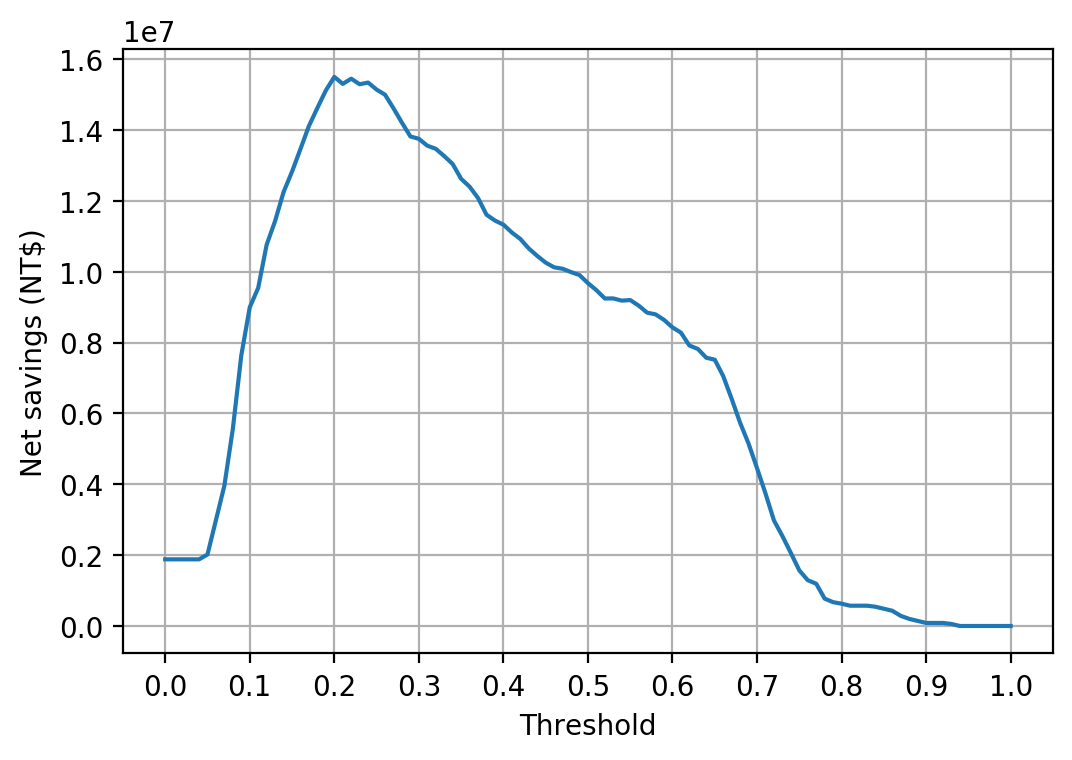

In [78]:
mpl.rcParams['figure.dpi'] = 200
plt.plot(thresholds, net_savings)
plt.xlabel('Threshold')
plt.ylabel('Net savings (NT$)')
plt.xticks(np.linspace(0,1,11))
plt.grid(True)

In [79]:
max_savings_ix = np.argmax(net_savings)
max_savings_ix

20

In [80]:
thresholds[max_savings_ix]

0.2

In [81]:
net_savings[max_savings_ix]

15496067.800606266

# Challenge: Deriving Financial Insights

In [82]:
cost_of_all_defaults = sum(y_test_all == 1) * savings_per_default
cost_of_all_defaults

66308240.202088244

In [83]:
print(f"{(net_savings[max_savings_ix] / cost_of_all_defaults) * 100} %")

23.36974673642183 %


In [84]:
net_savings_per_account = net_savings[max_savings_ix] / len(y_test_all)
net_savings_per_account

2609.644291109172

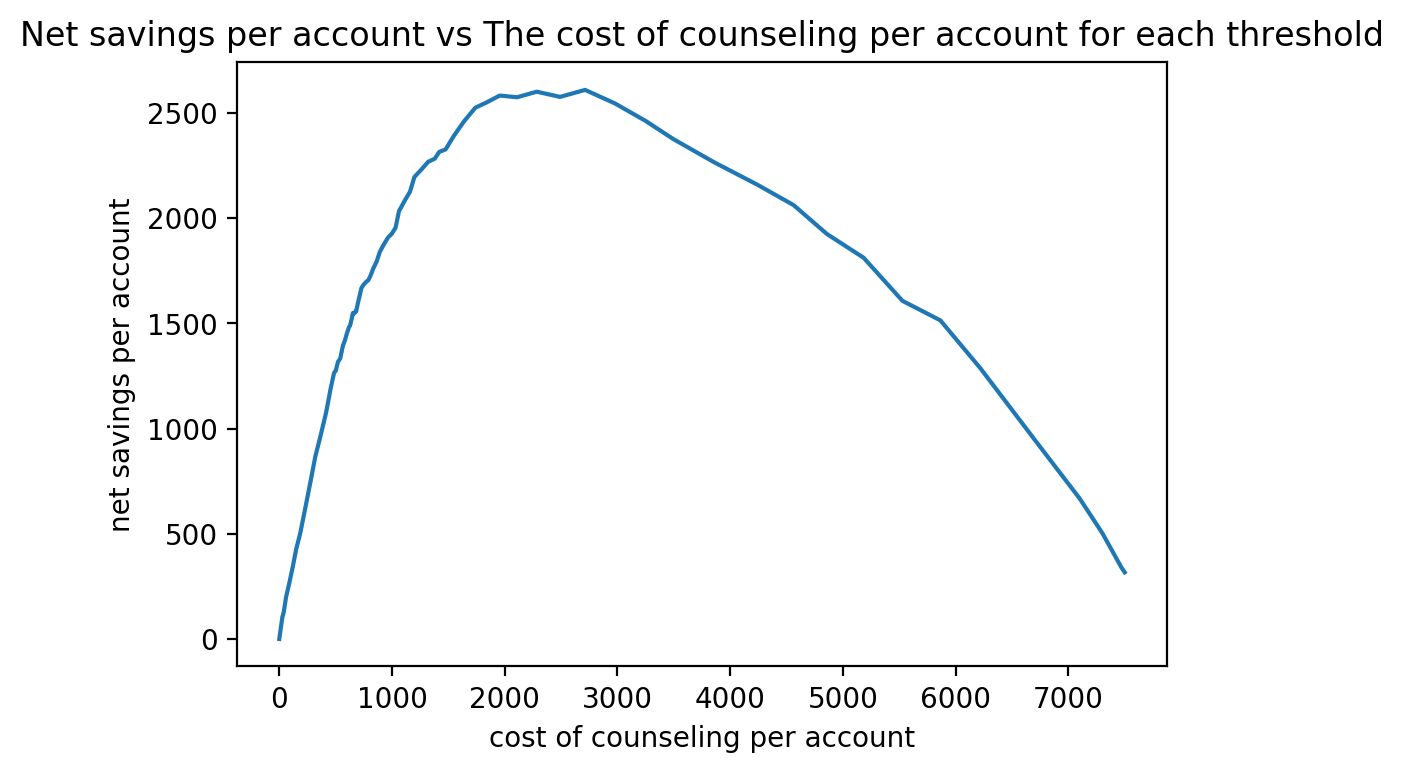

In [85]:
plt.plot(cost_of_all_counselings / len(y_test_all), net_savings/len(y_test_all))
plt.xlabel("cost of counseling per account")
plt.ylabel("net savings per account")
plt.title("Net savings per account vs The cost of counseling per account for each threshold")
plt.show()


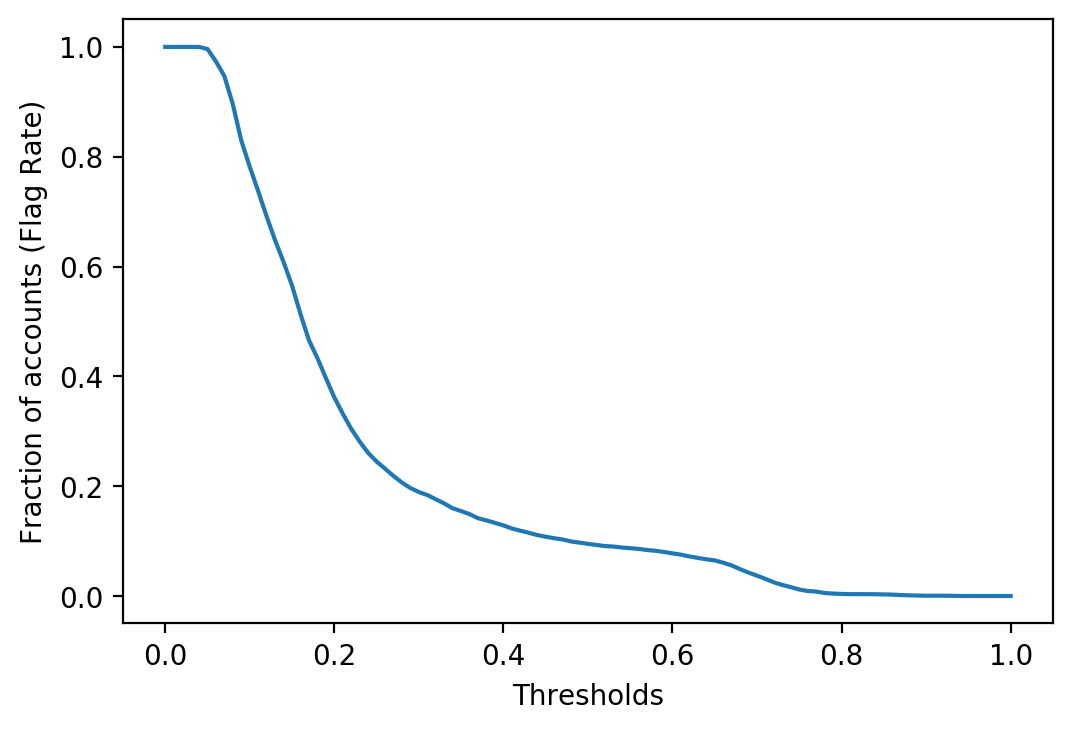

In [86]:
fractions = n_pos_pred / len(y_test_all)

plt.plot(thresholds, fractions)
plt.xlabel("Thresholds")
plt.ylabel("Fraction of accounts (Flag Rate)")
plt.show()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


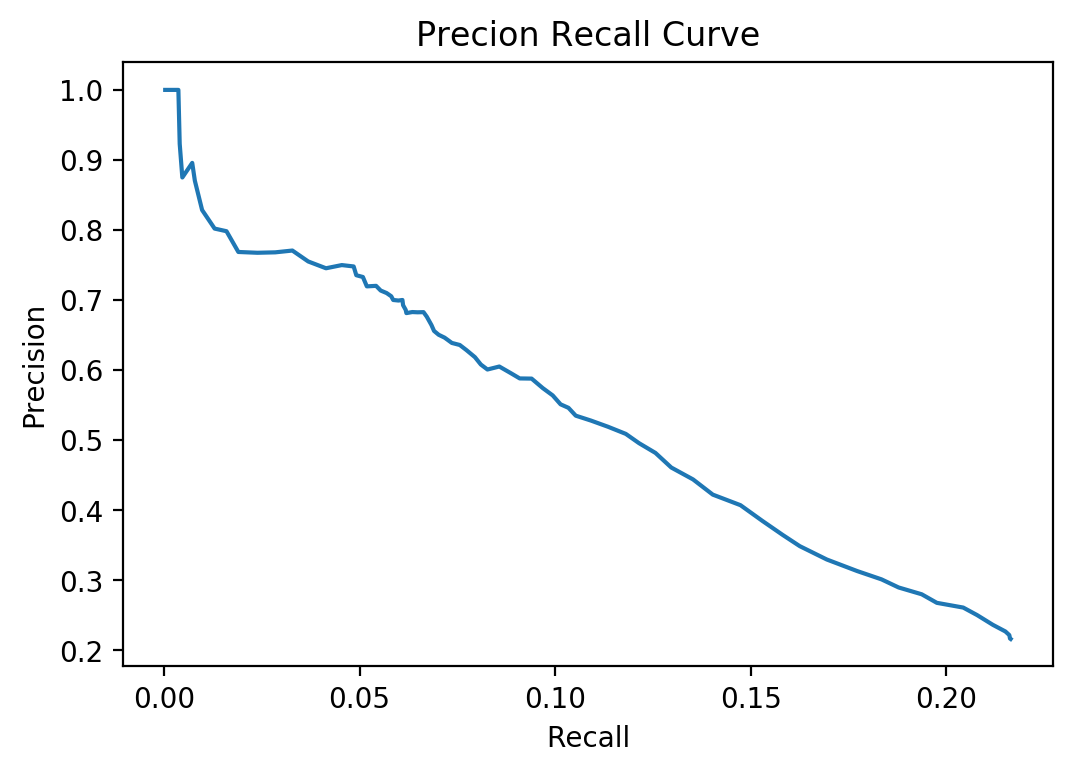

In [87]:
plt.plot(n_true_pos / len(y_test_all), np.divide(n_true_pos,n_pos_pred))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precion Recall Curve")
plt.show()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


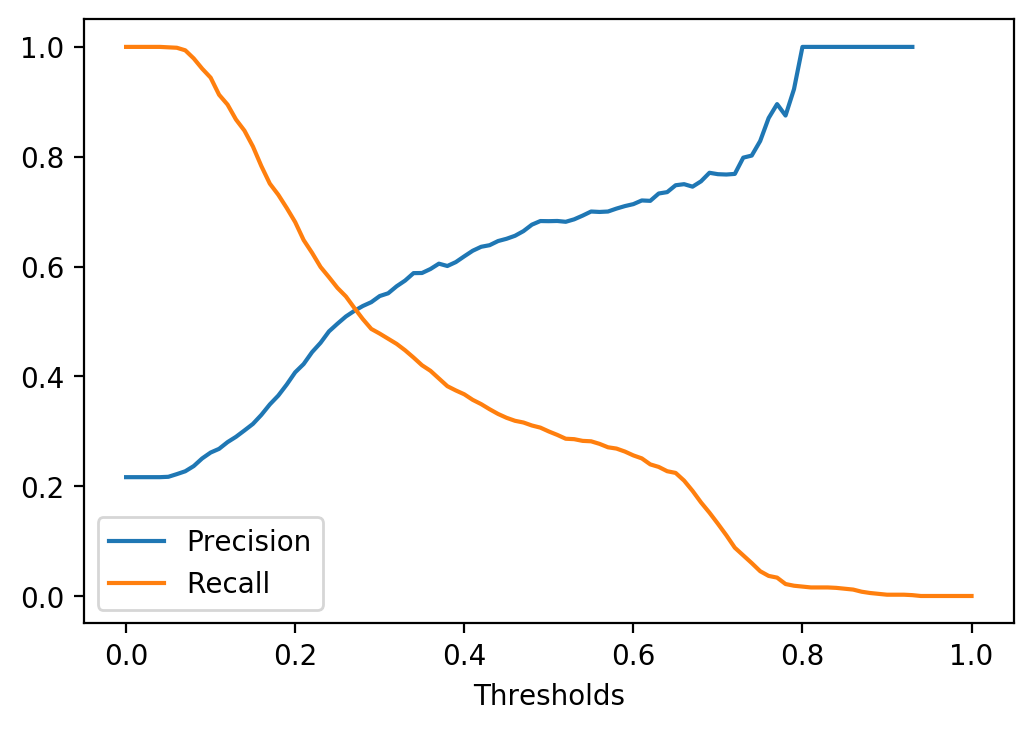

In [88]:
precision = n_true_pos / n_pos_pred
recall = n_true_pos/sum(y_test_all)

plt.plot(thresholds, precision, label = "Precision")
plt.plot(thresholds, recall, label = "Recall")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

In [89]:
import pickle

In [90]:
pickle.dump(rf, open("final_model.pkl", "wb"))